# Tugas Besar IF2220 Probabilitas dan Statistika
# Penarikan Kesimpulan dan Pengujian Hipotesis
---
## Anggota
13522033 Bryan Cornelius Lauwrence

13522105 Fabian Radenta Bangun

## Pranala Github
<https://github.com/BryanLauw/IF2220-Probstat>

---
---

## Daftar Isi
---
1. [PREREQUISITE](#prerequisite)
2. [SOAL 1](#soal-1)
   1. [Bagian 1.1: Deskripsi Data String](#soal-1-1)
      1. [Bagian 1.1.2: Kolom Brand](#soal-1-1-1)
      2. [Bagian 1.1.3: Kolom Grade](#soal-1-1-2)
   2. [Bagian 1.2: Deskripsi Data Float](#soal-1-2)
      1. [Bagian 1.2.1: Kolom Battery Power](#soal-1-2-1)
      1. [Bagian 1.2.2: Kolom Clock Speed](#soal-1-2-2)
      1. [Bagian 1.2.3: Kolom RAM](#soal-1-2-3)
      1. [Bagian 1.2.4: Kolom N Cores](#soal-1-2-4)
      1. [Bagian 1.2.5: Kolom Use Time](#soal-1-2-5)
      1. [Bagian 1.2.6: Kolom PX Width](#soal-1-2-6)
      1. [Bagian 1.2.7: Kolom PX Height](#soal-1-2-7)
      1. [Bagian 1.2.8: Kolom 5G](#soal-1-2-8)
      1. [Bagian 1.2.9: Kolom Price](#soal-1-2-9)
3. [SOAL 2](#soal-2)
4. [SOAL 3](#soal-3)
   1. [Bagian 3.1: Kolom Battery Power](#soal-3-1)
   2. [Bagian 3.2: Kolom Clock Speed](#soal-3-2)
   3. [Bagian 3.3: Kolom RAM](#soal-3-3)
   4. [Bagian 3.4: Kolom N Cores](#soal-3-4)
   5. [Bagian 3.5: Kolom Use Time](#soal-3-5)
   6. [Bagian 3.6: Kolom PX Width](#soal-3-6)
   7. [Bagian 3.7: Kolom PX Height](#soal-3-7)
   8. [Bagian 3.8: Kolom 5G](#soal-3-8)
   9. [Bagian 3.9: Kolom Brand](#soal-3-9)
   10. [Bagian 3.10: Kolom Grade](#soal-3-10)
   11. [Bagian 3.11: Kolom Price](#soal-3-11)
5. [SOAL 4](#soal-4)
   1. [Bagian 4.1: Kolom Battery Power](#soal-4-1)
   2. [Bagian 4.2: Kolom Clock Speed](#soal-4-2)
   3. [Bagian 4.3: Kolom RAM](#soal-4-3)
   4. [Bagian 4.4: Kolom N Cores](#soal-4-4)
   5. [Bagian 4.5: Kolom Use Time](#soal-4-5)
   6. [Bagian 4.6: Kolom PX Width](#soal-4-6)
   7. [Bagian 4.7: Kolom PX Height](#soal-4-7)
   8. [Bagian 4.8: Kolom 5G](#soal-4-8)
   9. [Bagian 4.9: Kolom Price](#soal-4-9)
6. [SOAL 5](#soal-5)
   1. [Bagian 5.1](#soal-5-1)
   2. [Bagian 5.2](#soal-5-2)
   3. [Bagian 5.3](#soal-5-3)
   4. [Bagian 5.4](#soal-5-4)
7. [SOAL 6](#soal-6)
   1. [Bagian 6.1](#soal-6-1)
   2. [Bagian 6.2](#soal-6-2)
   3. [Bagian 6.3](#soal-6-3)
   4. [Bagian 6.4](#soal-6-4)

---
---

### PREREQUISITE <a id="prerequisite"></a>
---
Sebelum melakukan pengerjaan soal-soal tugas besar, dibutuhkan setup sebagai prerequisite atau tahap awal pengerjaan. Prerequisite dilakukan dengan melakukan import library dan mengubah file CSV menjadi sebuah dataframe yang nantinya akan digunakan. Selain itu, prerequisite dilakukan dengan membuang data-data yang kotor, misalnya data negatif atau undefined

In [1]:
# Melakukan import library yang akan diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
# Mengimport data
df = pd.read_csv('phone.csv')
print("Jumlah data awal:", len(df))
# Membersihkan data yang kotor
clean_data = df.loc[(df["battery_power"] > 0) & (df["clock_speed"] > 0) & (df["ram"] > 0) & (df["n_cores"] > 0) & (df["use_time"] >= 0) & (df["px_width"] > 0) & (df["px_height"] > 0) & (df["brand"] != "undefined") & (df["5g"] > 0) & (df["grade"] != "undefined") & (df["price"] > 0)]
clean_data = clean_data.drop_duplicates()
clean_data = clean_data.reset_index(drop=True)
df = clean_data
print("Jumlah data akhir:", len(df))

Jumlah data awal: 2000
Jumlah data akhir: 1994


Karena jumlah data yang kotor hanya ada 6/2000 (0.3%), kami memutuskan untuk membuang data kotor tersebut karena jumlahnya sedikit dan jika dibiarkan akan mempengaruhi perhitungan nantinya

---
---

### SOAL 1 <a id="soal-1"></a>
---
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data. Data yang bersifat numerik dapat diberikan nilai mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Data dalam bentuk string dapat dicari unique values, dan proporsi nya. 

Langkah pertama adalah memisahkan data bertipe integer dengan data bertipe string

In [3]:
# Memisahkan data
number_data = df.select_dtypes(include=float)
string_data = df.select_dtypes(include=object)

#### Bagian 1.1: Deskripsi Data String <a id="soal-1-1"></a>

In [4]:
def descString(data, kolom):
    print(f"Kolom '{kolom}'")
    un = data[kolom].nunique()
    proportion = (un/len(df))*100
    print("Jumlah data unik:", un)
    print("Proporsi data " + str(proportion) + "%")

string_data.describe()

,brand,grade
count,1994,1994
unique,4,3
top,sumseng,A
freq,675,691


##### Bagian 1.1.1: Kolom Brand <a id = "soal-1-1-1"></a>

In [5]:
descString(string_data, 'brand')

Kolom 'brand'
Jumlah data unik: 4
Proporsi data 0.20060180541624875%


##### Bagian 1.1.2: Kolom Grade <a id = "soal-1-1-2"></a>

In [6]:
descString(string_data, 'grade')

Kolom 'grade'
Jumlah data unik: 3
Proporsi data 0.15045135406218654%


#### Bagian 1.2: Deskripsi Data Float <a id="soal-1-2"></a>

In [7]:
def descNum(data, kolom):
    print(f"Kolom '{kolom}'")
    print("mean: {:.2f}".format(data[kolom].mean()))
    print("median: {:.2f}".format(data[kolom].median()))
    print("modus: {:.2f}".format(data[kolom].mode()[0]))
    print("standar deviasi: {:.2f}".format(data[kolom].std()))
    print("variansi: {:.2f}".format(data[kolom].var()))
    print("nilai maksimal: {:.2f}".format(data[kolom].max()))
    print("nilai minimal: {:.2f}".format(data[kolom].min()))
    print("rentang: {:.2f}".format(data[kolom].max() - data[kolom].min()))
    print("kuartil 1: {:.2f}".format(data[kolom].quantile(0.25)))
    print("kuartil 2: {:.2f}".format(data[kolom].quantile(0.5)))
    print("kuartil 3: {:.2f}".format(data[kolom].quantile(0.75)))
    print("IQR: {:.2f}".format(data[kolom].quantile(0.75) - data[kolom].quantile(0.25)))
    print("kurtosis: {:.2f}".format(data[kolom].kurtosis()))
    print("skew: {:.2f}".format(data[kolom].skew()))

number_data.describe()

,battery_power,clock_speed,ram,n_cores,use_time,px_width,px_height,5g,price
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,1920.905905,1.102437,6.052050,12.050296,8.044695,728.717573,1035.293586,0.507209,7973.941441
std,136.199291,0.300913,1.995831,2.230719,1.183589,0.702074,0.701624,0.288448,1982.166704
min,1420.954271,0.063078,0.071127,5.634702,3.994350,726.673319,1032.823317,0.000147,1420.694047
25%,1834.106538,0.902568,4.690202,10.566416,7.278961,728.228816,1034.867122,0.256117,6665.136166
50%,1922.512779,1.100199,6.019183,12.077425,8.034224,728.652546,1035.366543,0.509358,7983.843922
75%,2011.317285,1.307641,7.412093,13.543293,8.871452,729.175804,1035.792904,0.755336,9245.986777
max,2401.957818,2.145640,12.147370,22.191140,11.856342,731.401917,1037.509932,2.000000,15293.505980


##### Bagian 1.2.1: Kolom Battery Power <a id = "soal-1-2-1"></a>

In [8]:
descNum(number_data, "battery_power")

Kolom 'battery_power'
mean: 1920.91
median: 1922.51
modus: 1420.95
standar deviasi: 136.20
variansi: 18550.25
nilai maksimal: 2401.96
nilai minimal: 1420.95
rentang: 981.00
kuartil 1: 1834.11
kuartil 2: 1922.51
kuartil 3: 2011.32
IQR: 177.21
kurtosis: 0.22
skew: -0.04


##### Bagian 1.2.2: Kolom Clock Speed <a id = "soal-1-2-2"></a>

In [9]:
descNum(number_data, "clock_speed")

Kolom 'clock_speed'
mean: 1.10
median: 1.10
modus: 0.06
standar deviasi: 0.30
variansi: 0.09
nilai maksimal: 2.15
nilai minimal: 0.06
rentang: 2.08
kuartil 1: 0.90
kuartil 2: 1.10
kuartil 3: 1.31
IQR: 0.41
kurtosis: 0.05
skew: -0.04


##### Bagian 1.2.3: Kolom RAM <a id = "soal-1-2-3"></a>

In [10]:
descNum(number_data, "ram")

Kolom 'ram'
mean: 6.05
median: 6.02
modus: 0.07
standar deviasi: 2.00
variansi: 3.98
nilai maksimal: 12.15
nilai minimal: 0.07
rentang: 12.08
kuartil 1: 4.69
kuartil 2: 6.02
kuartil 3: 7.41
IQR: 2.72
kurtosis: -0.17
skew: 0.07


##### Bagian 1.2.4: Kolom N Cores <a id = "soal-1-2-4"></a>

In [11]:
descNum(number_data, "n_cores")

Kolom 'n_cores'
mean: 12.05
median: 12.08
modus: 5.63
standar deviasi: 2.23
variansi: 4.98
nilai maksimal: 22.19
nilai minimal: 5.63
rentang: 16.56
kuartil 1: 10.57
kuartil 2: 12.08
kuartil 3: 13.54
IQR: 2.98
kurtosis: 0.01
skew: 0.02


##### Bagian 1.2.5: Kolom Use Time <a id = "soal-1-2-5"></a>

In [12]:
descNum(number_data, "use_time")

Kolom 'use_time'
mean: 8.04
median: 8.03
modus: 3.99
standar deviasi: 1.18
variansi: 1.40
nilai maksimal: 11.86
nilai minimal: 3.99
rentang: 7.86
kuartil 1: 7.28
kuartil 2: 8.03
kuartil 3: 8.87
IQR: 1.59
kurtosis: 0.03
skew: -0.07


##### Bagian 1.2.6: Kolom PX Width <a id = "soal-1-2-6"></a>

In [13]:
descNum(number_data, "px_width")

Kolom 'px_width'
mean: 728.72
median: 728.65
modus: 726.67
standar deviasi: 0.70
variansi: 0.49
nilai maksimal: 731.40
nilai minimal: 726.67
rentang: 4.73
kuartil 1: 728.23
kuartil 2: 728.65
kuartil 3: 729.18
IQR: 0.95
kurtosis: 0.04
skew: 0.40


##### Bagian 1.2.7: Kolom PX Height<a id = "soal-1-2-7"></a>

In [14]:
descNum(number_data, "px_height")

Kolom 'px_height'
mean: 1035.29
median: 1035.37
modus: 1032.82
standar deviasi: 0.70
variansi: 0.49
nilai maksimal: 1037.51
nilai minimal: 1032.82
rentang: 4.69
kuartil 1: 1034.87
kuartil 2: 1035.37
kuartil 3: 1035.79
IQR: 0.93
kurtosis: 0.12
skew: -0.45


##### Bagian 1.2.8: Kolom 5G <a id = "soal-1-2-8"></a>

In [15]:
descNum(number_data, "5g")

Kolom '5g'
mean: 0.51
median: 0.51
modus: 0.00
standar deviasi: 0.29
variansi: 0.08
nilai maksimal: 2.00
nilai minimal: 0.00
rentang: 2.00
kuartil 1: 0.26
kuartil 2: 0.51
kuartil 3: 0.76
IQR: 0.50
kurtosis: -0.87
skew: 0.06


##### Bagian 1.2.9: Kolom Price <a id = "soal-1-2-9"></a>

In [16]:
descNum(number_data, "price")

Kolom 'price'
mean: 7973.94
median: 7983.84
modus: 1420.69
standar deviasi: 1982.17
variansi: 3928984.84
nilai maksimal: 15293.51
nilai minimal: 1420.69
rentang: 13872.81
kuartil 1: 6665.14
kuartil 2: 7983.84
kuartil 3: 9245.99
IQR: 2580.85
kurtosis: 0.03
skew: 0.04


---
---

### SOAL 2 <a id="soal-2"></a>
---
Menangani *outlier* pada data

In [17]:
# Battery Power
q11 = df["battery_power"].quantile(0.25)
q31 = df["battery_power"].quantile(0.75)
iqr1 = q31 - q11
temp = df.loc[(df["battery_power"] >= (q11 - 1.5*iqr1)) & (df["battery_power"] <= (q31 + 1.5*iqr1))]

# Clock Speed
q12 = df["clock_speed"].quantile(0.25)
q32 = df["clock_speed"].quantile(0.75)
iqr2 = q32 - q12
temp = temp.loc[(temp["clock_speed"] >= (q12 - 1.5*iqr2)) & (temp["clock_speed"] <= (q32 + 1.5*iqr2))]

# Ram
q13 = df["ram"].quantile(0.25)
q33 = df["ram"].quantile(0.75)
iqr3 = q33 - q13
temp = temp.loc[(temp["ram"] >= (q13 - 1.5*iqr3)) & (temp["ram"] <= (q33 + 1.5*iqr3))]

# N Cores
q14 = df["n_cores"].quantile(0.25)
q34 = df["n_cores"].quantile(0.75)
iqr4 = q34 - q14
temp = temp.loc[(temp["n_cores"] >= (q14 - 1.5*iqr4)) & (temp["n_cores"] <= (q34 + 1.5*iqr4))]

# Use Time
q15 = df["use_time"].quantile(0.25)
q35 = df["use_time"].quantile(0.75)
iqr5 = q35 - q15
temp = temp.loc[(temp["use_time"] >= (q15 - 1.5*iqr5)) & (temp["use_time"] <= (q35 + 1.5*iqr5))]

# PX Width
q16 = df["px_width"].quantile(0.25)
q36 = df["px_width"].quantile(0.75)
iqr6 = q36 - q16
temp = temp.loc[(temp["px_width"] >= (q16 - 1.5*iqr6)) & (temp["px_width"] <= (q36 + 1.5*iqr6))]

# PX Height
q17 = df["px_height"].quantile(0.25)
q37 = df["px_height"].quantile(0.75)
iqr7 = q37 - q17
temp = temp.loc[(temp["px_height"] >= (q17 - 1.5*iqr7)) & (temp["px_height"] <= (q37 + 1.5*iqr7))]

# 5G
q18 = df["5g"].quantile(0.25)
q38 = df["5g"].quantile(0.75)
iqr8 = q38 - q18
temp = temp.loc[(temp["5g"] >= (q18 - 1.5*iqr8)) & (temp["5g"] <= (q38 + 1.5*iqr8))]

# Price
q19 = clean_data["price"].quantile(0.25)
q39 = clean_data["price"].quantile(0.75)
iqr9 = q39 - q19
temp = temp.loc[(temp["price"] >= (q19 - 1.5*iqr9)) & (temp["price"] <= (q39 + 1.5*iqr9))]


print("Data dengan outlier berjumlah", len(df))
print("Data tanpa outlier berjumlah", len(temp))
df = temp

Data dengan outlier berjumlah 1994
Data tanpa outlier berjumlah 1859


Jadi, pada data tersebut terdapat 135 baris yang merupakan outlier. Untuk menangani outlier tersebut, kami memilih untuk membuang data yang merupakan outlier karena jumlah outlier hanya 6.68% dari seluruh data. Umumnya, persentase outlier yang kecil akan ditangani dengan membuang outlier. Meskipun membuang data akan mengakibatkan muncul outlier baru, kami membiarkan outlier baru tersebut karena merupakan hasil dari pembersihan pertama.

---
---

### SOAL 3 <a id="soal-3"></a>
---
Pada bagian ini, setiap kolom data akan divisualisasikan. Data yang berbentuk numerik akan ditampilkan dalam bentuk histogram dan boxplot. Sementara untuk data yang berbentuk string akan ditampilkan dalam bentuk histogram saja. Pada bagian bawah gambar hasil visualisasi juga dijelaskan bagaimana kondisi masing-masing kolom berdasarkan hasil visualisasi. Jika sebuah data pada kolom menghasilkan histogram yang kurvanya berbentuk lonceng dan memiliki titik puncak kurang lebih berada di tengah/dekat dengan rata-rata dapat dicurigai data pada kolom tersebut tidak jauh dari distribusi normal(nilai <i>skew</i> mendekati 0). Jika sebuah data pada kolom menghasilkan boxplot yang menunjukkan bahwa nilai median berada kurang lebih di tengah minimum dan maksimum, serta ditengah Q1 dan Q3 maka dapat dicurigai data pada kolom tersebut tidak jauh dari distribusi normal. Sementara untuk mengetahui kepastian apakah data pada kolom terdistribusi normal atau tidak akan dibahas pada perhitungan di pembahasan soal 4.

Deklarasi prosedur untuk menampilkan hasil visualisasi data.

In [18]:
def visualizeNumericData(col) :
    fig, axes = plt.subplots(1, 2, figsize=(15,5))
    splitted_title = col.split('_')
    title = ' '.join(word.title() for word in splitted_title)
    fig.suptitle(title + ' Data Visualization', size=18, weight='bold')
    axes[0].set_title(title + " Data Histogram", size=14)
    axes[0].set_xlabel('value', size=12)
    axes[1].set_title(title + " Data Boxplot", size=14)
    axes[1].set_xlabel('value', size=12)
    df[col].plot(kind='hist', bins=40, rwidth = 0.85, ax = axes[0])
    df.boxplot(column=col, ax=axes[1])

In [19]:
def visualizeStringData(col) :
    splitted_title = col.split('_')
    title = ' '.join(word.title() for word in splitted_title)
    string_data[col].value_counts().plot(kind='bar')
    plt.title(title + ' Data Visualization', size=18, weight='bold')
    plt.xlabel(title)
    plt.xticks(rotation=0)
    plt.ylabel('Frequency')

#### Bagian 3.1: Kolom Battery Power <a id="soal-3-1"></a>

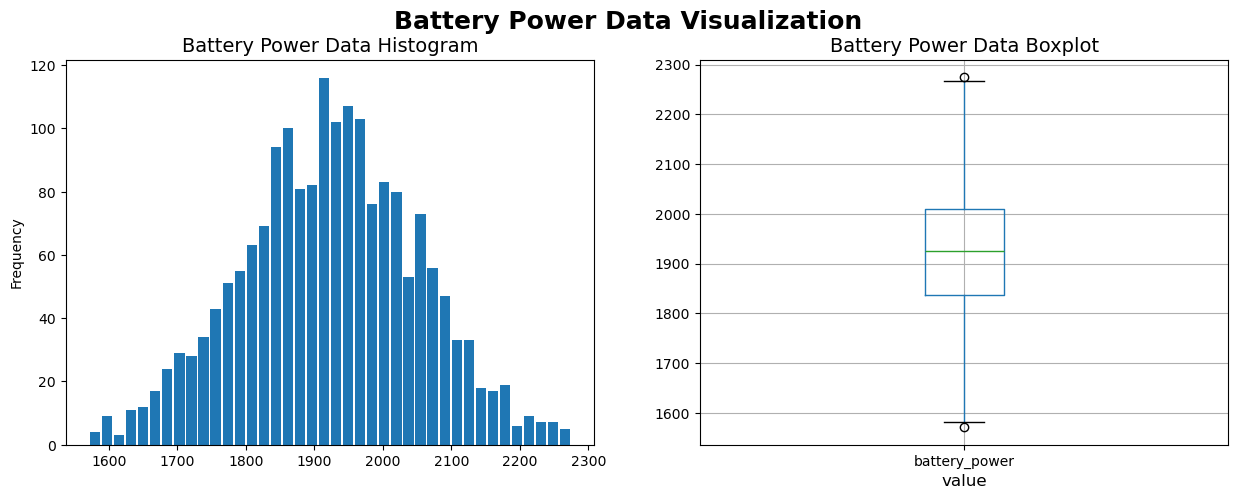

In [20]:
visualizeNumericData('battery_power')

Jika melihat hasil visualisasi boxplot, median dari data pada kolom Battery Power berada kurang lebih tepat di tengah nilai minimum dan maksimum, serta ditengah Q1 dan Q3. Hal tersebut menunjukkan bahwa data pada kolom Battery Power cenderung simetris/tidak jauh dari distribusi normal. Gambar boxplot menunjukkan adanya outlier di atas dan di bawah maksimum dan minimum. Adanya outlier mengindikasikan bahwa data dicurigai tidak mendekati distribusi normal. Namun, jika kita melihat histogram, bentuk lonceng yang dihasilkan kurang lebih simetris dan titik puncak kurva berada kurang lebih tepat ditengah-tengah kurva/dekat dengan rata-rata.

#### Bagian 3.2: Kolom Clock Speed <a id="soal-3-2"></a>

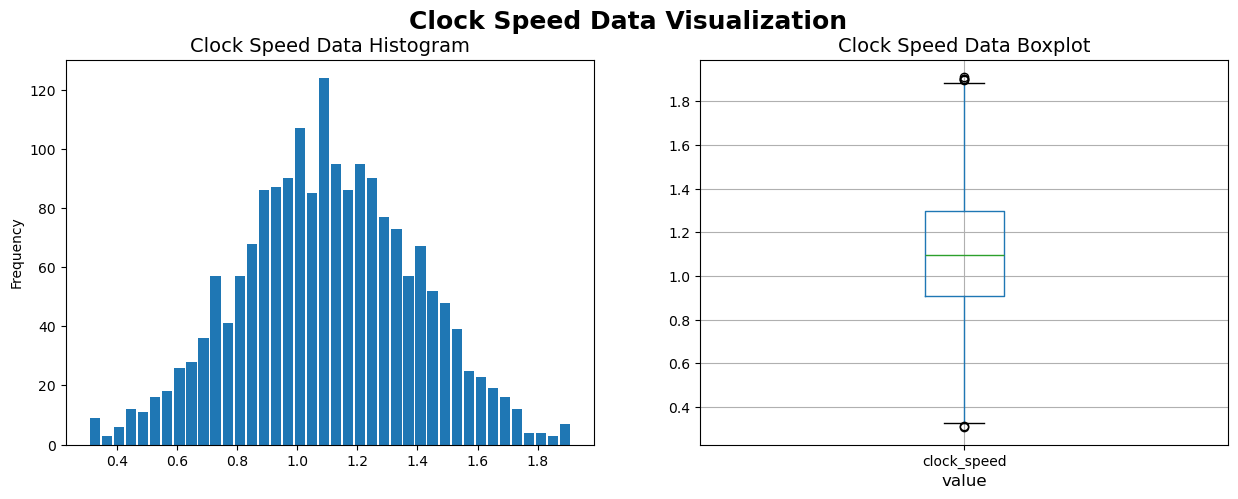

In [21]:
visualizeNumericData('clock_speed')

Jika melihat hasil visualisasi boxplot, median dari data pada kolom Clock Speed berada kurang lebih tepat di tengah nilai minimum dan maksimum, serta ditengah Q1 dan Q3. Hal tersebut menunjukkan bahwa data pada kolom Clock Speed cenderung simetris/tidak jauh dari distribusi normal. Gambar boxplot juga menunjukkan adanya outlier di atas dan di bawah maksimum dan minimum. Adanya outlier mengindikasikan bahwa data dicurigai tidak mendekati distribusi normal. Namun, jika kita melihat histogram, bentuk lonceng yang dihasilkan kurang lebih simetris dan titik puncak kurva berada kurang lebih tepat ditengah-tengah kurva/dekat dengan rata-rata.

#### Bagian 3.3: Kolom RAM <a id="soal-3-3"></a>

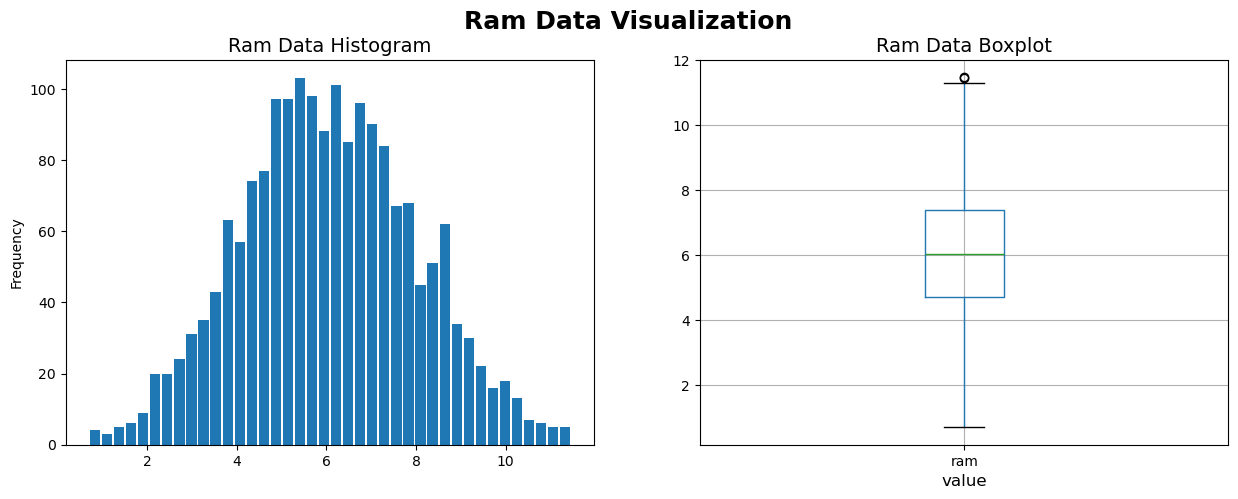

In [22]:
visualizeNumericData('ram')

Jika melihat hasil visualisasi boxplot, median dari data pada kolom RAM berada kurang lebih tepat di tengah nilai minimum dan maksimum, serta ditengah Q1 dan Q3. Hal tersebut menunjukkan bahwa data pada kolom RAM cenderung simetris/tidak jauh dari distribusi normal. Gambar boxplot juga menunjukkan adanya outlier di atas maksimum. Adanya outlier mengindikasikan bahwa data dicurigai tidak mendekati distribusi normal. Namun, jika kita melihat histogram, bentuk lonceng yang dihasilkan kurang lebih simetris dan titik puncak kurva berada kurang lebih tepat ditengah-tengah kurva/dekat dengan rata-rata.

#### Bagian 3.4: Kolom N Cores <a id="soal-3-4"></a>

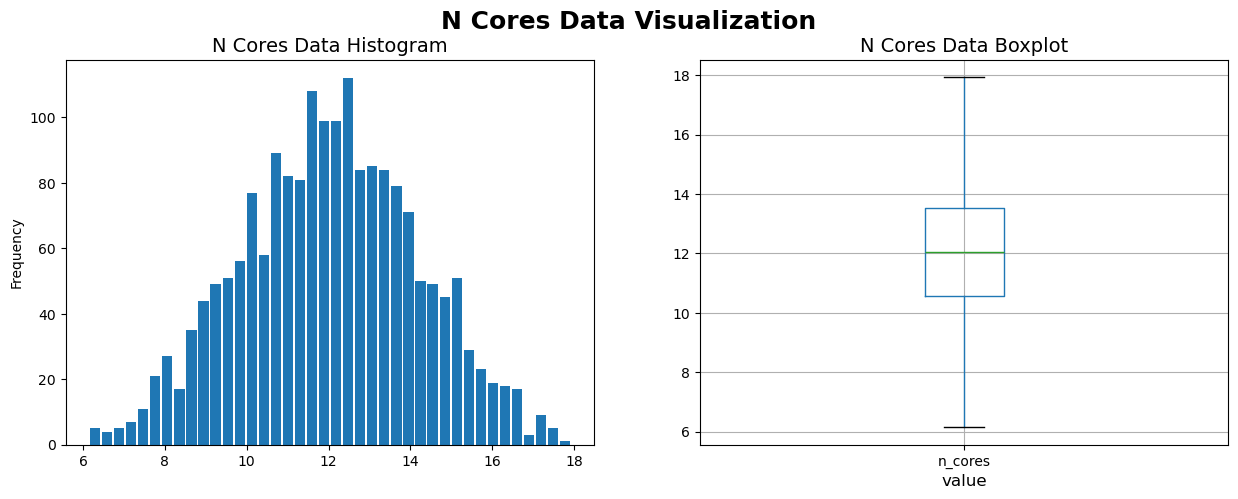

In [23]:
visualizeNumericData('n_cores')

Jika melihat hasil visualisasi boxplot, median dari data pada kolom N Cores berada kurang lebih tepat di tengah nilai minimum dan maksimum, serta ditengah Q1 dan Q3. Hal tersebut menunjukkan bahwa data pada kolom N Cores cenderung simetris/tidak jauh dari distribusi normal. Gambar boxplot juga menunjukkan bahwa tidak terdapat outlier baik diatas maupun dibawah maksimum dan minimum. Adanya outlier mengindikasikan bahwa data dicurigai tidak mendekati distribusi normal. Namun, jika kita melihat histogram, bentuk lonceng yang dihasilkan kurang lebih simetris dan titik puncak kurva berada kurang lebih tepat ditengah-tengah kurva/dekat dengan rata-rata.

#### Bagian 3.5: Kolom Use Time <a id="soal-3-5"></a>

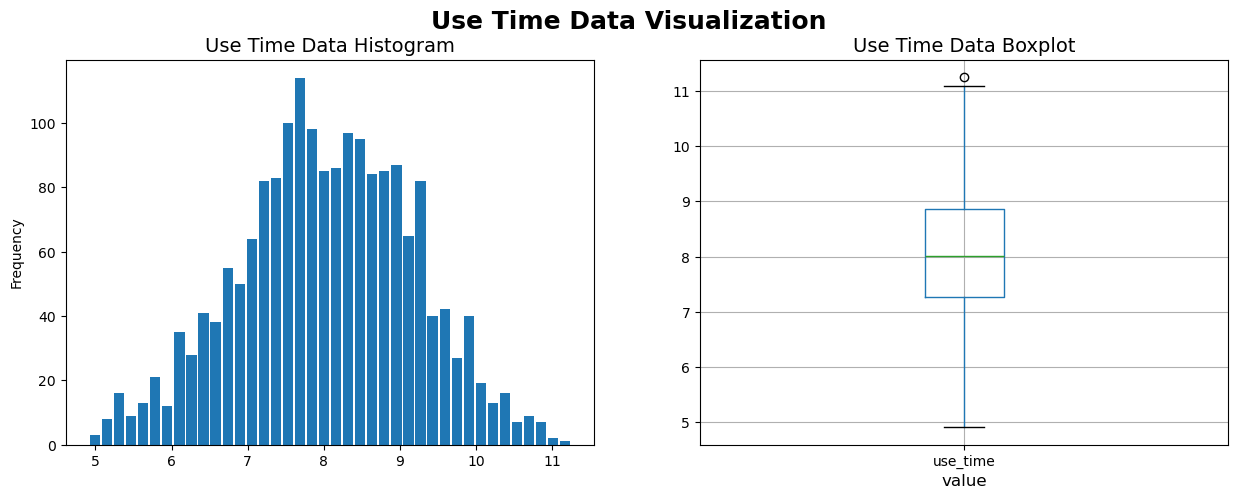

In [24]:
visualizeNumericData('use_time')

Jika melihat hasil visualisasi boxplot, median dari data pada kolom Use Time berada tidak tepat di tengah nilai minimum dan maksimum, serta tidak ditengah Q1 dan Q3. Nilai median lebih dekat ke minimum atau Q1. Hal tersebut mendukung bahwa data pada kolom Use Time tidak simetris/tidak dekat dari distribusi normal dan data memiliki <i>skewness</i> positif. Gambar boxplot menunjukkan adanya outlier di atas maksimum yang mengindikasikan bahwa data dicurigai menyimpang dari distribusi normal. Selain itu, jika kita melihat histogram, bentuk lonceng yang dihasilkan tidak simetris dan titik puncak kurva berada di bagian kiri kurva, bukan ditengah. Hal ini mendukung bahwa data memiliki <i>skewness</i> positif.

#### Bagian 3.6: Kolom PX Width <a id="soal-3-6"></a>

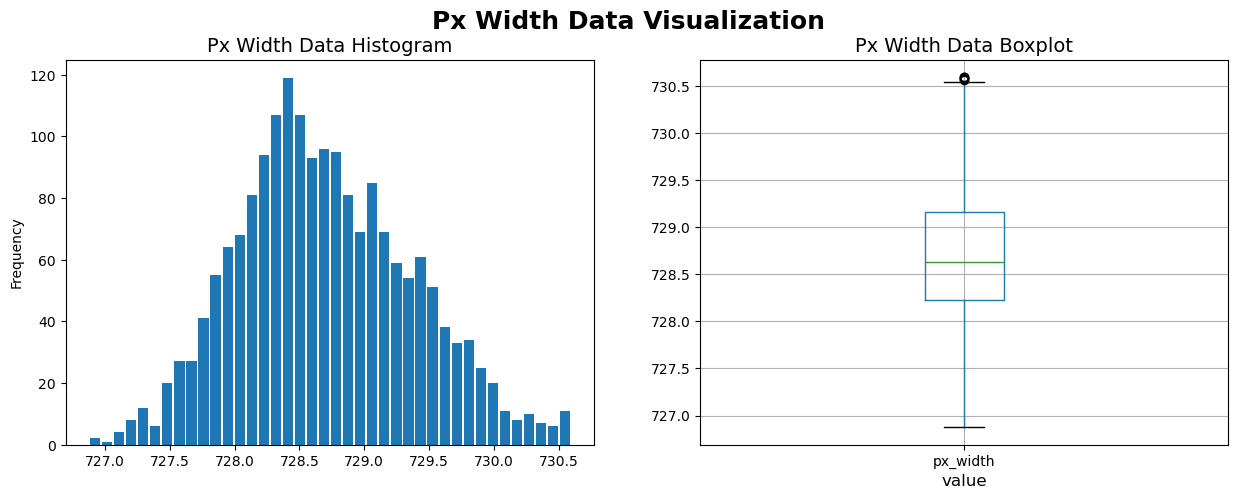

In [25]:
visualizeNumericData('px_width')

Jika melihat hasil visualisasi boxplot, median dari data pada kolom Px Width berada tidak tepat di tengah nilai minimum dan maksimum, serta tidak ditengah Q1 dan Q3. Nilai median lebih dekat ke minimum atau Q1. Hal tersebut mendukung bahwa data pada kolom Px Width tidak simetris/tidak dekat dari distribusi normal dan data memiliki <i>skewness</i> positif. Gambar boxplot menunjukkan adanya outlier di atas maksimum yang mengindikasikan bahwa data dicurigai menyimpang dari distribusi normal. Selain itu, jika kita melihat histogram, bentuk lonceng yang dihasilkan tidak simetris dan titik puncak kurva berada di bagian kiri kurva, bukan ditengah. Hal ini mendukung bahwa data memiliki <i>skewness</i> positif.

#### Bagian 3.7: Kolom PX Height <a id="soal-3-7"></a>

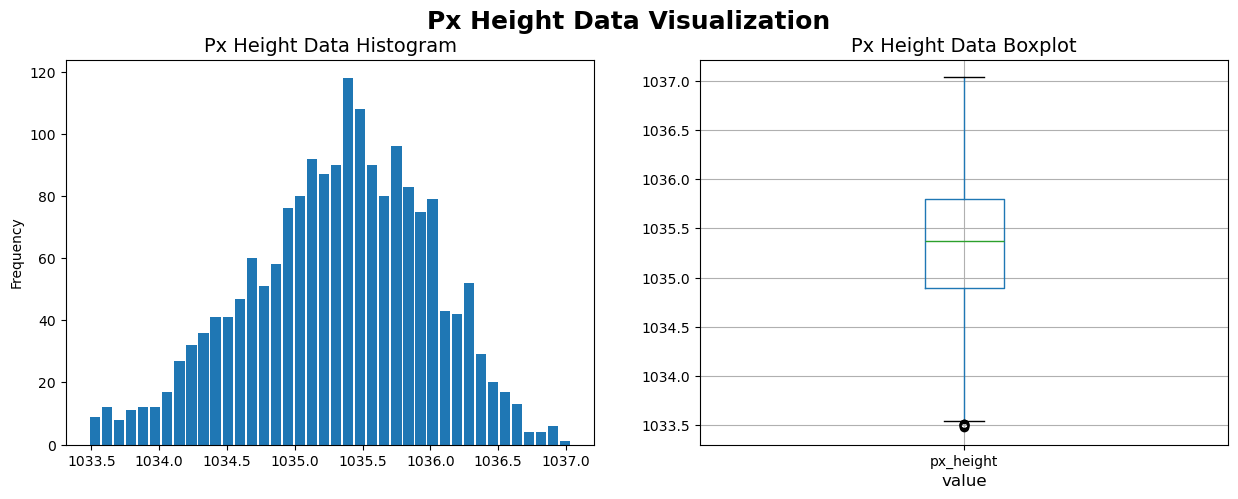

In [26]:
visualizeNumericData('px_height')

Jika melihat hasil visualisasi boxplot, median dari data pada kolom Px Height berada tidak tepat di tengah nilai minimum dan maksimum, serta tidak ditengah Q1 dan Q3. Nilai median lebih dekat ke maksimum atau Q3. Hal tersebut mendukung bahwa data pada kolom Px Height tidak simetris/tidak dekat dari distribusi normal dan data memiliki <i>skewness</i> negatif. Gambar boxplot menunjukkan adanya outlier di bawah minimum yang mengindikasikan bahwa data dicurigai menyimpang dari distribusi normal. Selain itu, jika kita melihat histogram, bentuk lonceng yang dihasilkan tidak simetris dan titik puncak kurva berada di bagian kanan kurva, bukan ditengah. Hal ini mendukung bahwa data memiliki <i>skewness</i> negatif.

#### Bagian 3.8: Kolom 5G <a id="soal-3-8"></a>

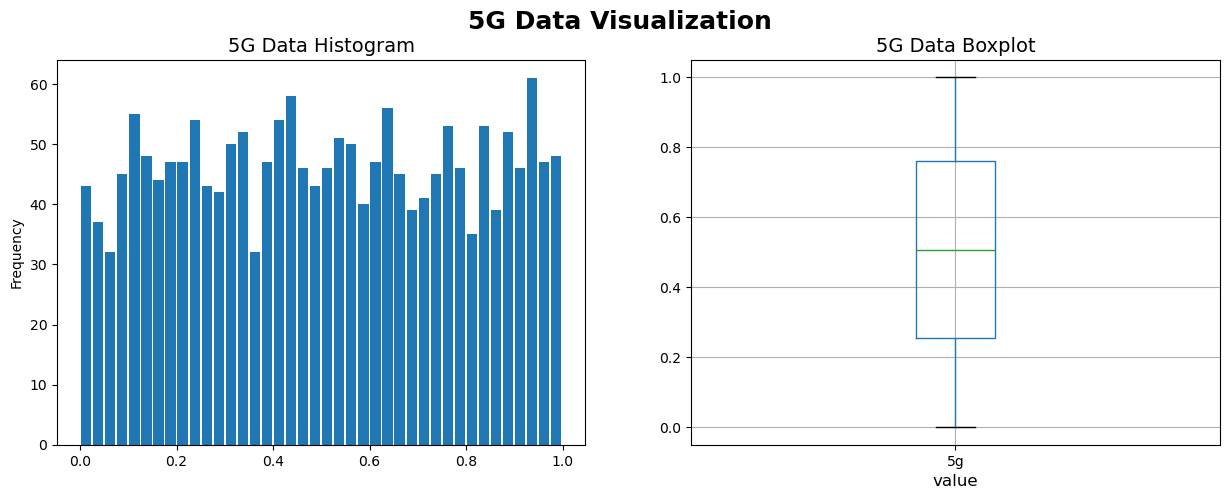

In [27]:
visualizeNumericData('5g')

Jika melihat hasil visualisasi boxplot, median dari data pada kolom 5G berada kurang lebih tepat di tengah nilai minimum dan maksimum, serta ditengah Q1 dan Q3. Hal tersebut menunjukkan bahwa data pada kolom 5G cenderung simetris/tidak jauh dari distribusi normal. Gambar boxplot juga menunjukkan bahwa tidak terdapat outlier baik diatas maupun dibawah maksimum dan minimum. Tidak adanya outlier mengindikasikan bahwa data dicurigai tidak jauh dari distribusi normal. Namun, jika kita melihat histogram, kurva tidak menunjukkan bentuk kurva lonceng dan memiliki banyak puncak dan lembah. Hal ini mendukung bahwa kurva tidak dekat dari distribusi normal.

#### Bagian 3.9: Kolom Brand <a id="soal-3-9"></a>

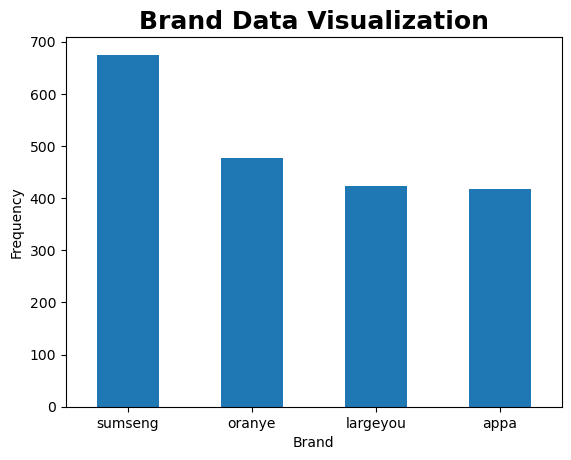

In [28]:
visualizeStringData('brand')

Dari hasil visualisasi kolom Brand, dapat dilihat bahwa pada <i>database</i> terdapat 4 jenis Brand, yaitu sumseng, oranye, largeyou, dan appa. Brand yang paling sering muncul adalah sumseng dengan angka kemunculan mendekati 700. Lalu yang kedua adalah oranye dengan angka kemunculan mendekati 500. Kemudian yang ketiga adalah largeyou dengan angka kemunculan sekitar 450. Dan yang terakhir/paling jarang muncul adalah appa dengan angka kemunculan kurang lebih 450 juga, tetapi kurang dari largeyou.

#### Bagian 3.10: Kolom Grade <a id="soal-3-10"></a>

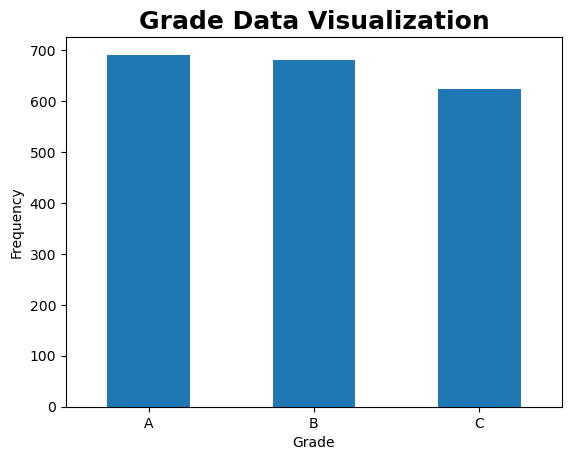

In [29]:
visualizeStringData('grade')

Dari hasil visualisasi kolom Grade, dapat dilihat bahwa pada <i>database</i> terdapat 3 jenis Grade, yaitu A, B, dan C. Grade yang paling sering muncul adalah A dengan angka kemunculan mendekati 700. Lalu yang kedua adalah B dengan angka kemunculan mendekati 700 juga, tetapi jumlahnya kurang dari jumlah kemunculan A. Dan yang terakhir/paling jarang muncul adalah C dengan angka kemunculan kurang lebih 650.

#### Bagian 3.11: Kolom Price <a id="soal-3-11"></a>

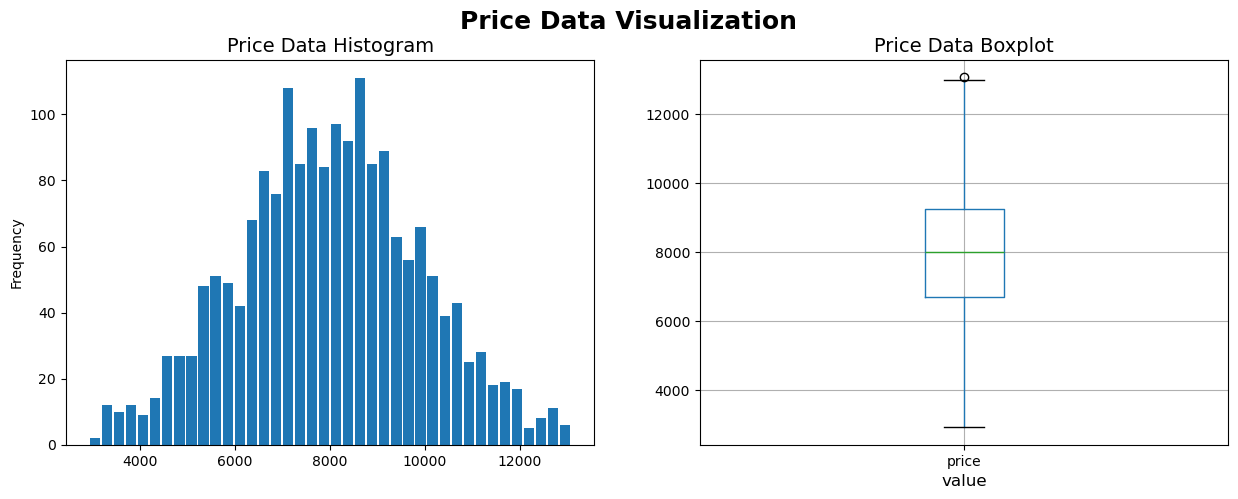

In [30]:
visualizeNumericData('price')

Jika melihat hasil visualisasi boxplot, median dari data pada kolom price berada tidak tepat di tengah nilai minimum dan maksimum, serta tidak ditengah Q1 dan Q3. Nilai median lebih dekat ke maksimum atau Q3. Hal tersebut mendukung bahwa data pada kolom price tidak simetris/tidak dekat dari distribusi normal dan data memiliki <i>skewness</i> negatif. Gambar boxplot menunjukkan adanya outlier di bawah minimum yang mengindikasikan bahwa data dicurigai menyimpang dari distribusi normal. Selain itu, jika kita melihat histogram, bentuk lonceng yang dihasilkan tidak simetris dan titik puncak kurva berada di bagian kanan kurva, bukan ditengah. Hal ini mendukung bahwa data memiliki <i>skewness</i> negatif.

---
---

### Soal 4 <a id="soal-4"></a>
---
Menentukan distribusi setiap kolom numerik menggunakan hasil visualisasi histogram

In [61]:
def normalityTest(col) :
    k2, p_value = stats.normaltest(df[col])
    print(f"Nilai K^2 dari data pada kolom {col} adalah {k2} dengan p-value sebesar {p_value}")
    splitted_title = col.split('_')
    title = ' '.join(word.title() for word in splitted_title)
    fig, axes = plt.subplots(1, 2, figsize = (14, 4))
    fig.suptitle("Normality Test on " + title + " Data", weight = 'bold')
    
    df[col].plot(kind='hist', bins=50, rwidth = 0.85, density = True, ax = axes[0])
        
    range = np.arange(df[col].min(), df[col].max(), 0.001)
    axes[0].plot(range, stats.norm.pdf(range, df[col].mean(), df[col].std()), linewidth = 2.5, color = 'red')
    axes[0].set_title(title + " Data Histogram and Normal Curve")
    axes[0].set_xlabel("Value")

    stats.probplot(df[col], plot = axes[1])
    axes[1].set_title(title + " Data Normal Probability Plot")
    axes[1].set_ylabel("Empirical Quantiles")

#### Bagian 4.1: Kolom Battery Power<a id="soal-4-1"></a>

Nilai K^2 dari data pada kolom battery_power adalah 4.839376665312213 dengan p-value sebesar 0.08894933574293216


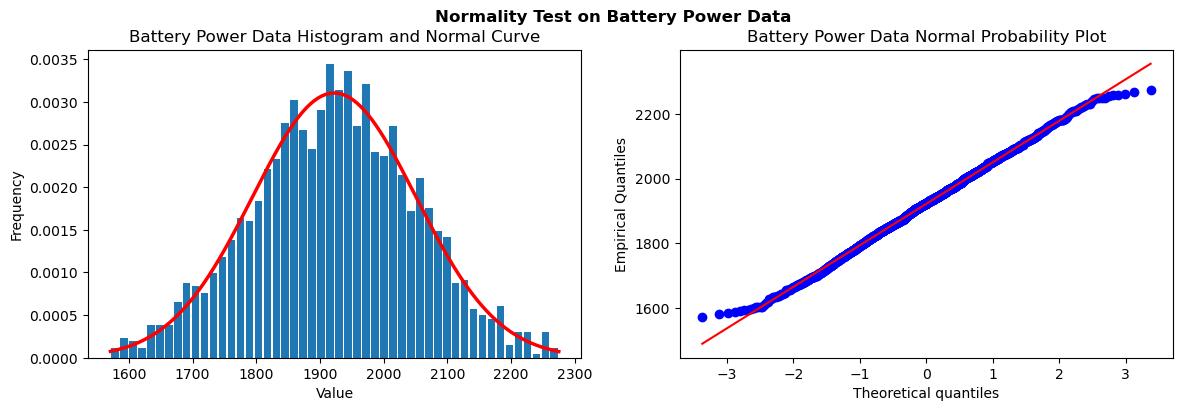

In [62]:
normalityTest('battery_power')

#### Bagian 4.2: Kolom Clock Speed<a id="soal-4-2"></a>

Nilai K^2 dari data pada kolom clock_speed adalah 3.9785388597826525 dengan p-value sebesar 0.13679532752564016


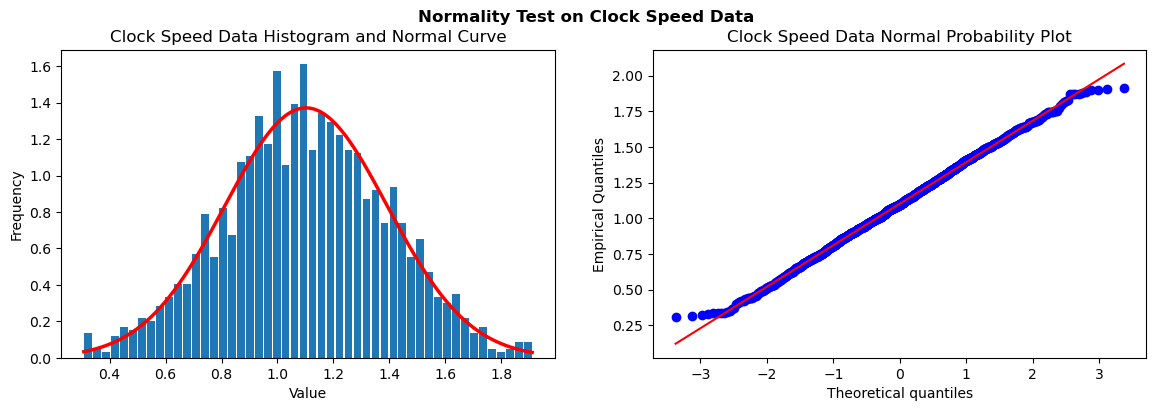

In [63]:
normalityTest('clock_speed')

#### Bagian 4.3: Kolom RAM<a id="soal-4-3"></a>

Nilai K^2 dari data pada kolom ram adalah 11.38368420635015 dengan p-value sebesar 0.003373373140979018


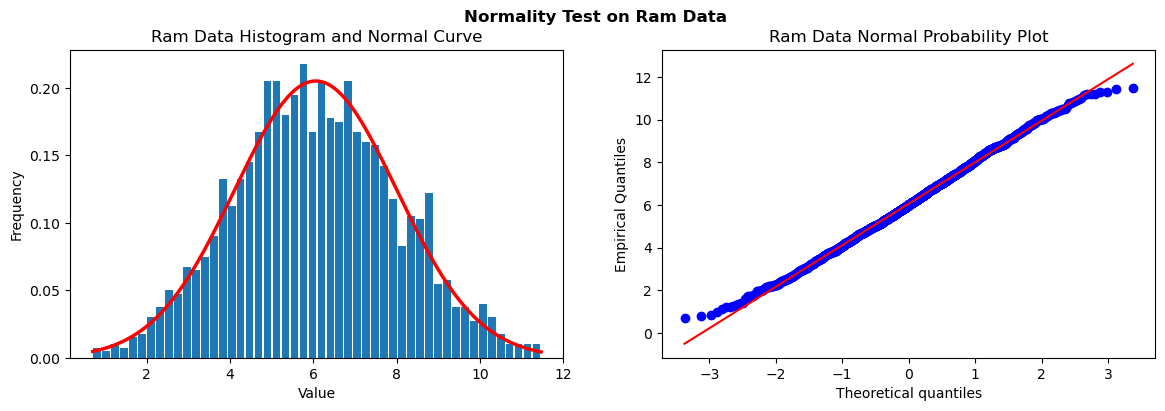

In [64]:
normalityTest('ram')

#### Bagian 4.4: Kolom N Cores<a id="soal-4-4"></a>

Nilai K^2 dari data pada kolom n_cores adalah 15.12049407410536 dengan p-value sebesar 0.0005207465842924462


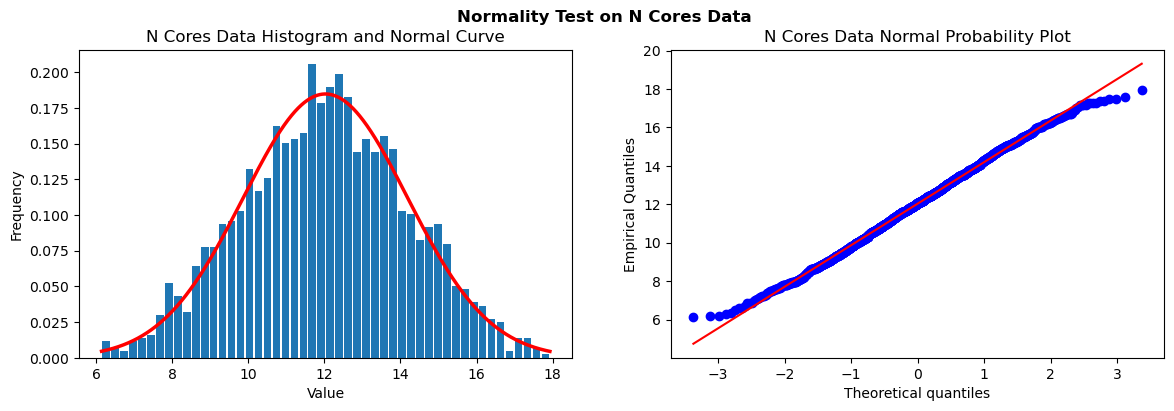

In [65]:
normalityTest('n_cores')

#### Bagian 4.5: Kolom Use Time<a id="soal-4-5"></a>

Nilai K^2 dari data pada kolom use_time adalah 9.346037151457164 dengan p-value sebesar 0.009344021277879064


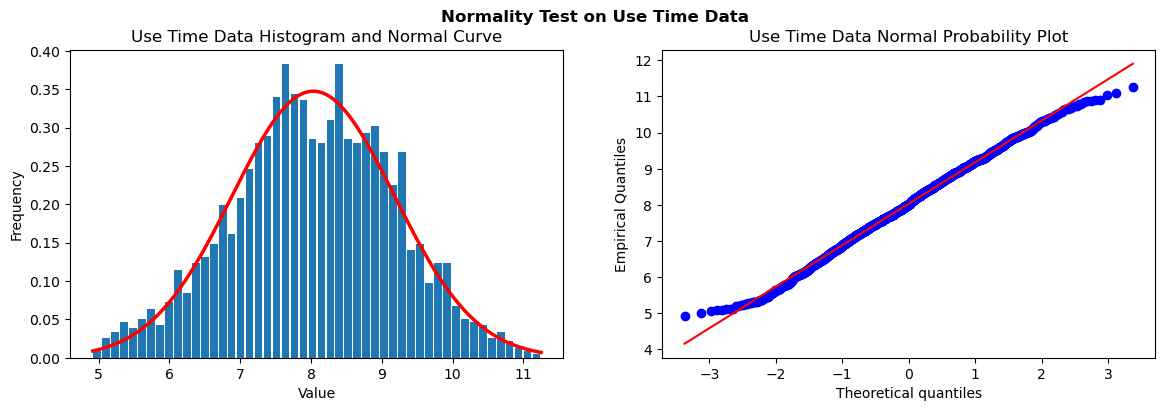

In [66]:
normalityTest('use_time')

#### Bagian 4.6: Kolom PX Width<a id="soal-4-6"></a>

Nilai K^2 dari data pada kolom px_width adalah 29.72810382867117 dengan p-value sebesar 3.5044855603139657e-07


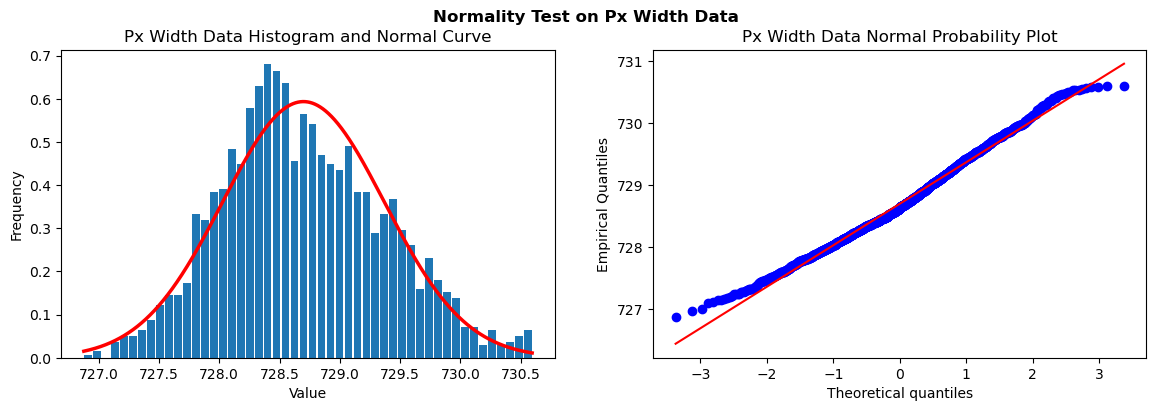

In [67]:
normalityTest('px_width')

#### Bagian 4.7: Kolom PX Height<a id="soal-4-7"></a>

Nilai K^2 dari data pada kolom px_height adalah 32.76639517998093 dengan p-value sebesar 7.671277457299589e-08


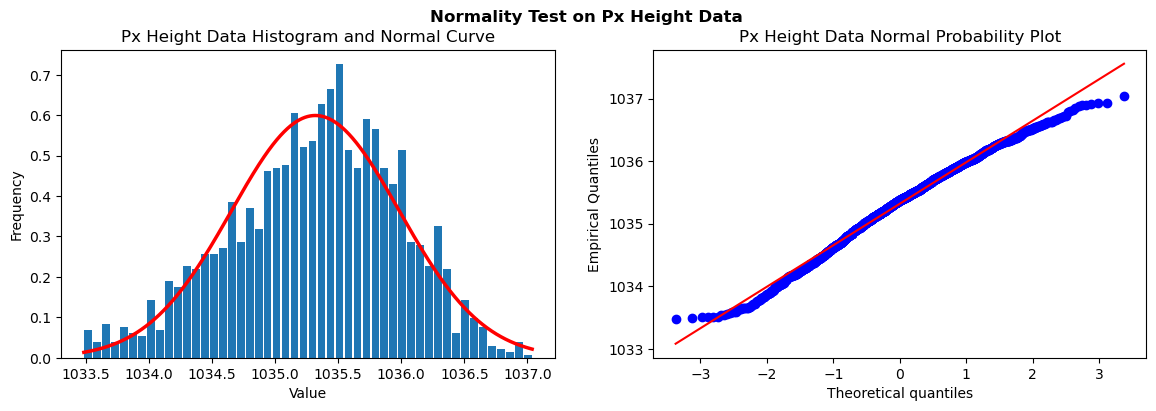

In [68]:
normalityTest('px_height')

#### Bagian 4.8: Kolom 5G<a id="soal-4-8"></a>

Nilai K^2 dari data pada kolom 5g adalah 1354.9068956306996 dengan p-value sebesar 6.105283952173837e-295


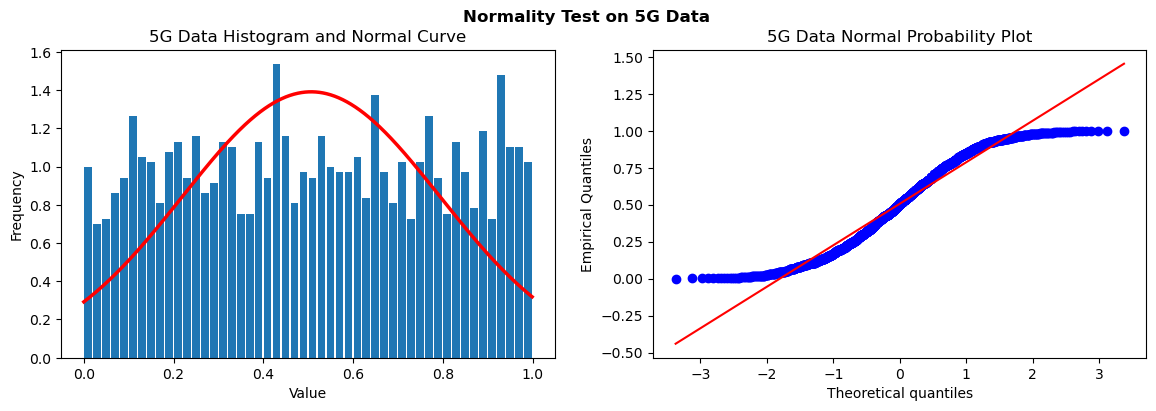

In [69]:
normalityTest('5g')

#### Bagian 4.9: Kolom Price<a id="soal-4-9"></a>

Nilai K^2 dari data pada kolom price adalah 6.649448071513593 dengan p-value sebesar 0.03598244725223589


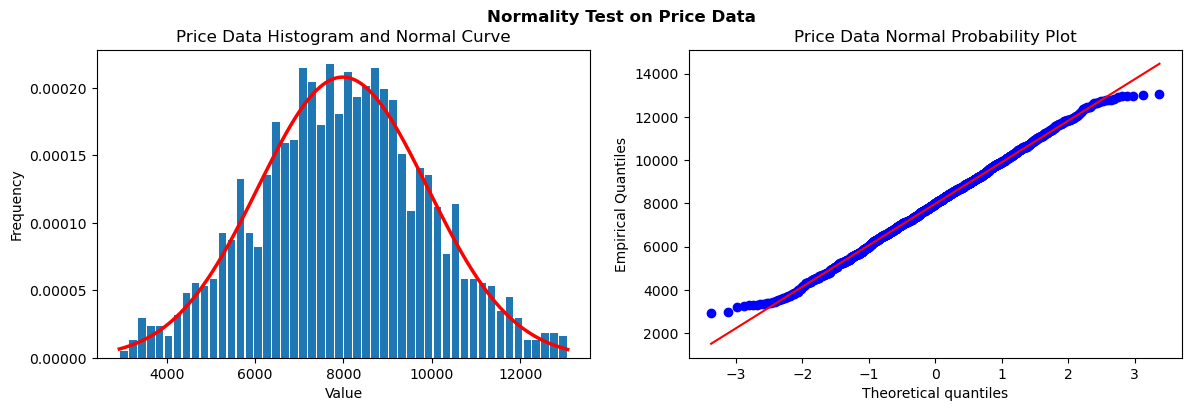

In [70]:
normalityTest('price')

---
---

### Soal 5 <a id="soal-5"></a>
---
Hipotesis 1 Sampel

Test hipotesis 1 sampel akan dilakukan dengan menerapkan langkah-langkah berikut:
1. Menentukan hipotesis null H<sub>0</sub>
2. Menentukan hipotesis alternatif H<sub>1</sub>
3. Menentukan tingkat signifikan $\alpha$
4. Menentukan uji statistik yang sesuai dan daerah kritis uji statistik
5. Menghitung nilai uji statistik dari sampel data dan menghitung p-value sesuai dengan uji statistik yang digunakan
6. Menolak hipotesis null H<sub>0</sub> jika nilai uji statistik berada di dalam daerah kritis dan jika p-value lebih kecil dari $\alpha$, atau tidak menolak hipotesis null H<sub>0</sub> jika nilai uji statistik berada di luar daerah kritis dan jika p-value tidak lebih kecil dari $\alpha$

Dalam seluruh test hipotesis pada soal 4, akan diambil tingkat signifikan $\alpha$ sebesar 0.05. Artinya, terdapat peluang sebesar 0.05 bahwa keputusan untuk menolak atau mendukung hipotesis null H<sub>0</sub> adalah salah. Dengan tingkat signifikan sebesar 0.05, diharapkan bahwa keputusan test hipotesis akan semakin mendekati kebenaran dan memberikan konsistensi keputusan yang tepat.

Test Hipotesis 1 Sampel akan dibagi menjadi beberapa bagian pengujian.

#### Bagian 5.1<a id="soal-5-1"></a>

#### Bagian 5.2<a id="soal-5-2"></a>

#### Bagian 5.3<a id="soal-5-3"></a>

#### Bagian 5.4<a id="soal-5-4"></a>

---
---

### Soal 6 <a id="soal-6"></a>
---
Hipotesis 2 Sampel

Test hipotesis 2 sampel akan dilakukan dengan menerapkan langkah-langkah berikut:
1. Menentukan hipotesis null H<sub>0</sub>
2. Menentukan hipotesis alternatif H<sub>1</sub>
3. Menentukan tingkat signifikan $\alpha$
4. Menentukan uji statistik yang sesuai dan daerah kritis uji statistik
5. Menghitung nilai uji statistik dari sampel data dan menghitung p-value sesuai dengan uji statistik yang digunakan
6. Menolak hipotesis null H<sub>0</sub> jika nilai uji statistik berada di dalam daerah kritis dan jika p-value lebih kecil dari $\alpha$, atau tidak menolak hipotesis null H<sub>0</sub> jika nilai uji statistik berada di luar daerah kritis dan jika p-value tidak lebih kecil dari $\alpha$

Dalam seluruh test hipotesis pada soal 6, akan diambil tingkat signifikan $\alpha$ sebesar 0.05. Artinya, terdapat peluang sebesar 0.05 bahwa keputusan untuk menolak atau mendukung hipotesis null H<sub>0</sub> adalah salah. Dengan tingkat signifikan sebesar 0.05, diharapkan bahwa keputusan test hipotesis akan semakin mendekati kebenaran dan memberikan konsistensi keputusan yang tepat.

Untuk soal ini setengah bagian pertama sampel dianggap sebagai sampel dari *smartphone* generasi sebelumnya (sampel 1) dan sisanya dianggap sebagai sampel dari *smartphone* generasi saat ini (sampel 2). Standar deviasi kedua populasi tidak diketahui dan diasumsikan nilainya berbeda.

Test Hipotesis 2 Sampel akan dibagi menjadi beberapa bagian pengujian.

In [61]:
# Pembagian sampel
prev_gen = df[:len(df)//2]
curr_gen = df[len(df)//2:]

# Fungsi-fungsi yang diperlukan
def v_two_samples(s1, n1, s2, n2):
  sn1 = (s1**2)/n1
  sn2 = (s2**2)/n2

  return round(((sn1+sn2)**2)/(((sn1**2)/(n1-1))+((sn2**2)/(n2-1))),0)

def t_one_tail(alpha, v, more):
    retVal = stats.t.ppf(1 - alpha, v)
    retVal = retVal * (1 if more else -1)
    
    return retVal

def t_two_tails(alpha, v):
  half = alpha/2
  retVal = stats.t.ppf(1-half, v)

  return retVal*-1, retVal

def f_one_tail(alpha, v1, v2, more):
  x = alpha
  if not more:
    x = 1 - alpha
  
  return stats.f.ppf(x, v1, v2)

def f_two_tails(alpha, v1, v2):
  half = alpha/2

  return stats.f.ppf(half, v1, v2), stats.f.ppf(1 - half, v1, v2)

def t_value(x1, x2, d, s1, n1, s2, n2):
  sn1 = (s1**2)/n1
  sn2 = (s2**2)/n2
  denominator = np.sqrt(sn1+sn2)
  
  return ((x1 - x2) - d)/denominator

def f_value(s1, s2):
  return (s1**2)/(s2**2)

def find_p(x1, n1, x2, n2):
  return (x1+x2)/(n1+n2)

def z_one_tail(alpha, more):
  retVal = stats.norm.ppf(1 - alpha)
  retVal = retVal * (1 if more else -1)
  
  return retVal

def z_two_tails(alpha):
  half = alpha/2
  retVal = stats.norm.ppf(1-half)

  return retVal*-1, retVal

def z_value(p1, p2, p, n1, n2):
  q = 1 - p
  denominator = p*q*((1/n1)+(1/n2))
  return (p1-p2)/(np.sqrt(denominator))

# Tingkat signifikan
alpha = 0.05

#### Bagian 6.1 <a id="soal-6-1"></a>
Apakah rata-rata jumlah core (n_cores) smartphone generasi sebelumnya sama dengan jumlah core smartphone generasi sekarang?

Karena variansi populasi smartphone generasi sebelumnya dan generasi saat ini tidak diketahui dan berbeda. Jadi digunakan rumus selisih rataan dua sampel dengan variansi yang berbeda dan jenis pengujian yang dilakukan adalah *two tailed test*.

**Langkah 1 : Menentukan hipotesis null H<sub>0</sub>**

Berdasarkan soal, kita akan melakukan pengujian terhadap selisih rataan data kolom jumlah *core* generasi sebelumnya dan generasi saat ini serta mengambil keputusan terhadap nilai tersebut. 

Dengan demikian, hipotesis null H<sub>0</sub> berupa:

$$ 
H_{0} : \mu_1 = \mu_2
$$ 
$$ 
H_{0} : \mu_1 - \mu_2 = 0
$$ 

**Langkah 2 : Menentukan hipotesis alternatif H<sub>1</sub>**

Dari hipotesis null yang ditentukan di langkah 1, akan dipilih hipotesis alternatif H<sub>1</sub> berupa:

$$
H_{1} : \mu_1 - \mu_2 \ne 0
$$

**Langkah 3 : Menentukan tingkat signifikan $\alpha$**

Dari pembahasan di awal soal 6, akan diambil tingkat signifikan sebesar:

$$
\alpha = 0.05
$$

**Langkah 4 : Menentukan uji statistik yang sesuai dan daerah kritis uji statistik**

Akan dilakukan pengujian apakah nilai $\mu$<sub>1</sub> sama dengan $\mu$<sub>2</sub> dengan sifat sebagai berikut:
1. Tes hipotesis bersifat dua arah (*two-tailed test*) 
2. Variansi populasi tidak diketahui
3. Variansi kedua populasi tidak sama / berbeda

Dengan demikian, dibutuhkan uji statistik selisih rataan 2 sampel dengan variansi populasi yang tidak diketahui dan variansi kedua populasi berbeda yang memiliki daerah kritis berupa:
$$
t > t_{\alpha / 2}  \text{ atau } t < -t_{\alpha / 2} \text{ dengan v = } \frac{({s_{awal}}^2/n_{awal} + {s_{akhir}}^2/n_{akhir})^2}{\frac{({s_{awal}}^2/n_{awal})^2}{n_{awal}-1} + \frac{({s_{akhir}}^2/n_{akhir})^2}{n_{akhir}-1}}
$$

Kode dibawah melakukan perhitungan untuk langkah 4.

In [62]:
# Populasi Jumlah Core
prev_gen_n_cores = prev_gen["n_cores"]
curr_gen_n_cores = curr_gen["n_cores"]

x1a = prev_gen_n_cores.mean()
x2a = curr_gen_n_cores.mean()
s1a = prev_gen_n_cores.std()
s2a = curr_gen_n_cores.std()
da = 0

va = v_two_samples(s1a, len(prev_gen_n_cores), s2a, len(curr_gen_n_cores))
tLeft, tRight = t_two_tails(alpha, va)

print("Derajat kebebasan adalah v =", va)
print("Daerah kritis adalah lebih kecil dari", tLeft, "atau lebih besar dari", tRight)

Derajat kebebasan adalah v = 1857.0
Daerah kritis adalah lebih kecil dari -1.9612422785064352 atau lebih besar dari 1.9612422785064352


Dengan demikian, daerah kritis uji statistik berupa:

$$
t < -1.9612422785064352 \text{ atau } t > 1.9612422785064352
$$

**Langkah 5 : Menghitung nilai uji statistik dari sampel data dan menghitung p-value sesuai dengan uji statistik yang digunakan**

Nilai dari uji statistik dihitung dengan menggunakan rumus berikut

$$
t = \frac{(\overline{x}_1 - \overline{x}_2) - d_{0}}{\sqrt{{s_1}^2 / n_1 + {s_2}^2 / n_2}}
$$

Kode dibawah melakukan perhitungan untuk langkah 5, beserta nilai *p*.

In [63]:
ta = t_value(x1a, x2a, da, s1a, len(prev_gen_n_cores), s2a, len(curr_gen_n_cores))
pa = stats.t.sf(abs(ta), df=va)*2

print("Nilai uji statistik adalah", ta)
print("Dengan p-value", pa)

Nilai uji statistik adalah 0.8087907378128335
Dengan p-value 0.4187391301410669


**Langkah 6 : Menolak hipotesis null H<sub>0</sub> jika nilai uji statistik berada di dalam daerah kritis dan jika p-value lebih kecil dari $\alpha$, atau tidak menolak hipotesis null H<sub>0</sub> jika nilai uji statistik berada di luar daerah kritis dan jika p-value tidak lebih kecil dari $\alpha$**

Dari hasil langkah 5, didapatkan bahwa nilai uji statistik t = 0.8087907378128333 dengan p-value = 0.418739130141067

Karena nilai dari -1.9612422785064352 < 0.8087907378128333 < 1.9612422785064352 dan 0.418739130141067 > 0.05, maka **nilai uji statistik berada di luar daerah kritis uji statistik dan *p-value* lebih besar dibandingkan tingkat signifikan**. Jadi, **hipotesis null H<sub>0</sub> tidak ditolak** dan diambil kesimpulan bahwa **rata-rata jumlah *core* generasi sekarang sama dengan rata-rata jumlah *core* generasi sebelumnya**.

#### Bagian 6.2 <a id="soal-6-2"></a>
Apakah harga smartphone generasi sekarang lebih mahal 100 dari generasi sebelumnya?

Karena variansi populasi smartphone generasi sebelumnya dan generasi saat ini tidak diketahui dan berbeda. Jadi digunakan rumus selisih rataan dua sampel dengan variansi yang berbeda dan jenis pengujian yang dilakukan adalah *one tailed test*.

**Langkah 1 : Menentukan hipotesis null H<sub>0</sub>**

Berdasarkan soal, kita akan melakukan pengujian terhadap selisih rataan data kolom harga *smartphone* generasi sebelumnya dan harga *smartphone* generasi saat ini serta mengambil keputusan terhadap nilai tersebut. 

Dengan demikian, hipotesis null H<sub>0</sub> berupa:

$$ 
H_{0} : \mu_2 = \mu_1 + 100
$$ 
$$ 
H_{0} : \mu_1 - \mu_2 = -100
$$ 

**Langkah 2 : Menentukan hipotesis alternatif H<sub>1</sub>**

Dari hipotesis null yang ditentukan di langkah 1, akan dipilih hipotesis alternatif H<sub>1</sub> berupa:

$$
H_{1} : \mu_2 \ne \mu_1 + 100
$$
$$
H_{1} : \mu_1 - \mu_2 \ne -100
$$

**Langkah 3 : Menentukan tingkat signifikan $\alpha$**

Dari pembahasan di awal soal 6, akan diambil tingkat signifikan sebesar:

$$
\alpha = 0.05
$$

**Langkah 4 : Menentukan uji statistik yang sesuai dan daerah kritis uji statistik**

Akan dilakukan pengujian apakah nilai $\mu_2$ lebih besar daripada $\mu_1$ sebesar 100 dengan sifat sebagai berikut:
1. Tes hipotesis bersifat satu arah (_one-tailed test_) 
2. Variansi populasi tidak diketahui
3. Variansi kedua populasi tidak sama / berbeda

Dengan demikian, dibutuhkan uji statistik selisih rataan 2 sampel dengan variansi populasi yang tidak diketahui dan variansi kedua populasi berbeda yang memiliki daerah kritis berupa:
$$
t > t_{\alpha / 2}  \text{ atau } t < -t_{\alpha / 2} \text{ dengan v = } \frac{({s_{awal}}^2/n_{awal} + {s_{akhir}}^2/n_{akhir})^2}{\frac{({s_{awal}}^2/n_{awal})^2}{n_{awal}-1} + \frac{({s_{akhir}}^2/n_{akhir})^2}{n_{akhir}-1}}
$$

Kode dibawah melakukan perhitungan untuk langkah 4.

In [64]:
#Populasi harga smartphone
prev_gen_price = prev_gen["price"]
curr_gen_price = curr_gen["price"]

x1b = prev_gen_price.mean()
x2b = curr_gen_price.mean()
s1b = prev_gen_price.std()
s2b = curr_gen_price.std()
db = -100

vb = v_two_samples(s1b, len(prev_gen_price), s2b, len(curr_gen_price))
tLeft, tRight = t_two_tails(alpha, vb)

print("Derajat kebebasan adalah v =", vb)
print("Daerah kritis adalah lebih kecil dari", tLeft, "atau lebih besar dari", tRight)

Derajat kebebasan adalah v = 1857.0
Daerah kritis adalah lebih kecil dari -1.9612422785064352 atau lebih besar dari 1.9612422785064352


Dengan demikian, daerah kritis uji statistik berupa:

$$
t < -1.9612422785064352 \text{ atau } t > 1.9612422785064352
$$

**Langkah 5 : Menghitung nilai uji statistik dari sampel data dan menghitung p-value sesuai dengan uji statistik yang digunakan**

Nilai dari uji statistik dihitung dengan menggunakan rumus berikut

$$
t = \frac{(\overline{x}_1 - \overline{x}_2) - d_{0}}{\sqrt{{s_1}^2 / n_1 + {s_2}^2 / n_2}}
$$

Kode dibawah melakukan perhitungan untuk langkah 5, beserta nilai *p*.

In [65]:
tb = t_value(x1b, x2b, db, s1b, len(prev_gen_price), s2b, len(curr_gen_price))
pb = stats.t.sf(abs(tb), df=vb)*2

print("Nilai uji statistik adalah", tb)
print("Dengan p-value", pb)

Nilai uji statistik adalah 1.155936279288938
Dengan p-value 0.2478559172537129


**Langkah 6 : Menolak hipotesis null H<sub>0</sub> jika nilai uji statistik berada di dalam daerah kritis dan jika p-value lebih kecil dari $\alpha$, atau tidak menolak hipotesis null H<sub>0</sub> jika nilai uji statistik berada di luar daerah kritis dan jika p-value tidak lebih kecil dari $\alpha$**

Dari hasil langkah 5, didapatkan bahwa nilai uji statistik t = 1.1559362792889378 dengan p-value = 0.2478559172537131

Karena -1.9612422785064352 < 1.1559362792889378 < 1.9612422785064352 dan 0.2478559172537131 > 0.05, maka **nilai uji statistik berada di luar daerah kritis uji statistik dan *p-value* lebih besar dari tingkat signifikan**. Jadi, **hipotesis null H<sub>0</sub> tidak ditolak** dan diambil kesimpulan bahwa **harga *smartphone* generasi saat ini lebih mahal 100 daripada *smartphone* generasi sebelumnya**.

#### Bagian 6.3 <a id="soal-6-3"></a>
Apakah variansi dari tinggi smartphone (px_height) sama pada kedua generasi?

**Langkah 1 : Menentukan hipotesis null H<sub>0</sub>**

Berdasarkan soal, kita akan melakukan pengujian terhadap variansi data kolom tinggi *smartphone* generasi sebelumnya dan tinggi *smartphone* generasi saat ini serta mengambil keputusan terhadap nilai tersebut.

Dengan demikian, hipotesis null H<sub>0</sub> berupa:

$$
H_{0} :{\sigma_1}^2 = {\sigma_2}^2
$$

**Langkah 2 : Menentukan hipotesis alternatif H<sub>1</sub>**

Dari hipotesis null yang ditentukan di langkah 1, akan dipilih hipotesis alternatif H<sub>1</sub> berupa:

$$
H_{0} :{\sigma_1}^2 \ne {\sigma_2}^2
$$

**Langkah 3 : Menentukan tingkat signifikan $\alpha$**

Dari pembahasan di awal soal 6, akan diambil tingkat signifikan sebesar:

$$
\alpha = 0.05
$$

**Langkah 4 : Menentukan uji statistik yang sesuai dan daerah kritis uji statistik**

Akan dilakukan pengujian apakah nilai ${\sigma}^2$<sub>1</sub> sama dengan ${\sigma}^2$<sub>2</sub> dengan sifat sebagai berikut:
1. Tes hipotesis bersifat dua arah (_two-tailed test_) 

Dengan demikian, dibutuhkan uji statistik rasio variansi 2 sampel yang memiliki daerah kritis berupa:
$$
f > f_{\alpha/2}(v_{1},v_{2})  \text{ atau } f < f_{(1-\alpha/2)}(v_{1},v_{2})
$$


Kode dibawah melakukan perhitungan untuk langkah 4.

In [66]:
#Populasi tinggi smartphone
prev_px_height = prev_gen["px_height"]
curr_px_height = curr_gen["px_height"]

x1c = prev_px_height.mean()
x2c = curr_px_height.mean()
s1c = prev_px_height.std()
s2c = curr_px_height.std()
dc = -100

fLeft, fRight = f_two_tails(alpha, len(prev_px_height)-1, len(curr_px_height)-1)

print("Derajat kebebasan sampel smartphone generasi sebelumnya adalah", len(prev_px_height)-1)
print("Derajat kebebasan sampel smartphone generasi sekarang adalah", len(curr_px_height)-1)
print("Daerah kritis adalah lebih kecil dari", fLeft, "atau lebih besar dari", fRight)

Derajat kebebasan sampel smartphone generasi sebelumnya adalah 928
Derajat kebebasan sampel smartphone generasi sekarang adalah 929
Daerah kritis adalah lebih kecil dari 0.8792160760672677 atau lebih besar dari 1.1373716942694267


Dengan demikian, daerah kritis uji statistik berupa:

$$
f < 0.8792160760672677 \text{ atau } f > 1.1373716942694267
$$

**Langkah 5 : Menghitung nilai uji statistik dari sampel data dan menghitung p-value sesuai dengan uji statistik yang digunakan**

Nilai dari uji statistik dihitung dengan menggunakan rumus berikut

$$
f = \frac{{s_1}^2}{{s_2}^2}
$$

Kode dibawah melakukan perhitungan untuk langkah 5, beserta nilai *p*.

In [67]:
fc = f_value(s1c, s2c)
pc = stats.f.sf(fc, len(prev_px_height)-1, len(curr_px_height)-1)

print("Nilai uji statistik adalah", fc)
print("Dengan p-value", pc)

Nilai uji statistik adalah 1.0440675388560448
Dengan p-value 0.25564293751633194


**Langkah 6 : Menolak hipotesis null H<sub>0</sub> jika nilai uji statistik berada di dalam daerah kritis dan jika p-value lebih kecil dari $\alpha$, atau tidak menolak hipotesis null H<sub>0</sub> jika nilai uji statistik berada di luar daerah kritis dan jika p-value tidak lebih kecil dari $\alpha$**

Dari hasil langkah 5, didapatkan bahwa nilai uji statistik f = 1.0440675388560452 dengan p-value = 0.25564293751633044

Karena 0.8792160760672677 < 1.0440675388560452 < 1.1373716942694267 dan 0.25564293751633044 > 0.05, maka **nilai uji statistik berada di luar daerah kritis uji statistik dan *p-value* lebih besar dari tingkat signifikan**. Jadi, **hipotesis null H<sub>0</sub> tidak ditolak** dan diambil kesimpulan bahwa **variansi tinggi *smartphone* pada kedua generasi sama**.

#### Bagian 6.4 <a id="soal-6-4"></a>
Apakah proporsi kapasitas baterai (battery_power) smartphone yang lebih dari 2030 pada smartphone generasi sebelumnya lebih besar daripada proporsi kapasitas baterai (battery_power) smartphone yang lebih dari 2030 pada smartphone generasi sekarang?

**Langkah 1 : Menentukan hipotesis null H<sub>0</sub>**

Berdasarkan soal, kita akan melakukan pengujian terhadap proporsi data kolom kapasitas baterai *smartphone* generasi sebelumnya dan kapasitas baterai *smartphone* generasi saat ini yang lebih dari 2030 serta mengambil keputusan terhadap nilai tersebut.

Dengan demikian, hipotesis null H<sub>0</sub> berupa:

$$
H_{0} :p_1^2 = p_2^2
$$

**Langkah 2 : Menentukan hipotesis alternatif H<sub>1</sub>**

Dari hipotesis null yang ditentukan di langkah 1, akan dipilih hipotesis alternatif H<sub>1</sub> berupa:

$$
H_{0} :p_1^2 \ne p_2^2
$$

**Langkah 3 : Menentukan tingkat signifikan $\alpha$**

Dari pembahasan di awal soal 6, akan diambil tingkat signifikan sebesar:

$$
\alpha = 0.05
$$

**Langkah 4 : Menentukan uji statistik yang sesuai dan daerah kritis uji statistik**

Akan dilakukan pengujian apakah nilai p<sub>1</sub> sama dengan p<sub>2</sub> dengan sifat sebagai berikut:
1. Tes hipotesis bersifat dua arah (_two-tailed test_) 
2. Nilai dari n (jumlah sampel) lebih dari 500

Dengan demikian, dibutuhkan uji statistik selisih proporsi 2 sampel dengan memanfaatkan aproksimasi distribusi binomial dengan normal yang memiliki daerah kritis berupa:
$$
z < -z_{\alpha/2} \text{ atau } z > z_{\alpha/2}
$$


Kode dibawah melakukan perhitungan untuk langkah 4.

In [68]:
#Sampel kekuatan baterai smartphone
prev_battery_power = prev_gen["battery_power"]
curr_battery_power = curr_gen["battery_power"]

#Sampel kekuatan baterai smartphone di atas 2030
prev_bp_2030 = prev_battery_power.loc[prev_battery_power > 2030]
curr_bp_2030 = curr_battery_power.loc[curr_battery_power > 2030]

zLeft, zRight = z_two_tails(alpha)

print("Daerah kritis adalah lebih kecil dari", zLeft, "atau lebih besar dari", zRight)

Daerah kritis adalah lebih kecil dari -1.959963984540054 atau lebih besar dari 1.959963984540054


Dengan demikian, daerah kritis uji statistik berupa:

$$
z < -1.959963984540054 \text{ atau } z > 1.959963984540054
$$

**Langkah 5 : Menghitung nilai uji statistik dari sampel data dan menghitung p-value sesuai dengan uji statistik yang digunakan**

Nilai dari uji statistik dihitung dengan menggunakan rumus berikut

$$
z = \frac{\overline{p}_1 - \overline{p}_2}{\sqrt{\overline{p}.\overline{q}.(\frac{1}{n_1}) (\frac{1}{n_2})}}
$$
$$
\overline{p} = \frac{x_1 + x_2}{n_1 + n_2}
$$
$$
\overline{q} = 1 - \overline{p}
$$

Kode dibawah melakukan perhitungan untuk langkah 5, beserta nilai *p*.

In [69]:
p1 = len(prev_bp_2030) / len(prev_battery_power)
p2 = len(curr_bp_2030) / len(curr_battery_power)

pBar = find_p(len(prev_bp_2030), len(prev_battery_power), len(curr_bp_2030), len(curr_battery_power))

z = z_value(p1, p2, pBar, len(prev_battery_power), len(curr_battery_power))
p = stats.norm.sf(abs(z))

print("Proporsi sampel dari kekuatan baterai smartphone generasi sebelumnya yang lebih dari 2030 =", p1)
print("Proporsi sampel dari kekuatan baterai smartphone generasi sekarang yang lebih dari 2030 =", p2)
print("Nilai p-bar =", pBar)
print("Nilai dari uji statistik adalah", z)
print("Nilai p-value terkait adalah", p)

Proporsi sampel dari kekuatan baterai smartphone generasi sebelumnya yang lebih dari 2030 = 0.19590958019375673
Proporsi sampel dari kekuatan baterai smartphone generasi sekarang yang lebih dari 2030 = 0.2086021505376344
Nilai p-bar = 0.20225927918235612
Nilai dari uji statistik adalah -0.6811991653764476
Nilai p-value terkait adalah 0.24787273803742926


**Langkah 6 : Menolak hipotesis null H<sub>0</sub> jika nilai uji statistik berada di dalam daerah kritis dan jika p-value lebih kecil dari $\alpha$, atau tidak menolak hipotesis null H<sub>0</sub> jika nilai uji statistik berada di luar daerah kritis dan jika p-value tidak lebih kecil dari $\alpha$**

Dari hasil langkah 5, didapatkan bahwa nilai uji statistik z = -0.6811991653764476 dengan p-value = 0.24787273803742926

Karena -1.959963984540054 < -0.6811991653764476 < 1.959963984540054 dan 0.25564293751633044 > 0.05, maka **nilai uji statistik berada di luar daerah kritis uji statistik dan *p-value* lebih besar dari tingkat signifikan**. Jadi, **hipotesis null H<sub>0</sub> tidak ditolak** dan diambil kesimpulan bahwa **proporsi kekuarang baterai yang lebih dari 2030 di kedua generasi sama**.